![](https://drive.google.com/uc?id=1sv4h55MC90SnEkjhK0C2bwqttHEIqxco)

![](https://drive.google.com/uc?id=1-u-Y6pv9NA_NP8i1IQw2NEol05LM4lZP)

![](https://drive.google.com/uc?id=1lCY8iYulqS1HJobd7u9lSBY1IHBAfw1r)

# A neural network is the basis of deep learning that essentially mimics the functionality of the human brain to process information and learns to make informed conclusions.

![](https://drive.google.com/uc?id=1QOCOGWWQhaz8S4LQw4mQ0KlgjOkazA_9)

![](https://drive.google.com/uc?id=14dvoUneDV6O6eWfut4UgC_NBstovZn8M)

![](https://drive.google.com/uc?id=1i5Vie6DI8WofET3h90Z62N4gHfWWkvmV)

![](https://drive.google.com/uc?id=1Px74WySfeq-AJnvrQ2vszmPsM2bpJr2A)

![]()

# import libraries 

In [0]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2.2.0


# define helper functions

In [0]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history['val_'+metric], label='val_'+metric)
  plt.xlabel('time')
  plt.ylabel(metric)
  plt.grid(True)

  # place a legend on the right
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# get dataset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-05-23 14:50:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  49.7MB/s    in 1.3s    

2020-05-23 14:50:44 (49.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# unzip dataset

format: `!unzip "source_path" -d '"target_path"`

%%capture= *hides logs*

In [ ]:
%%capture

!unzip '/tmp/cats_and_dogs_filtered.zip' -d '/tmp'

# define training & validation subdirectories

In [0]:
base_dir = os.path.join('/tmp/cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

# visualize metadata and dataset

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

In [0]:
train_cats_file_names = os.listdir(train_cats_dir)
train_dogs_file_names = os.listdir(train_dogs_dir)

valid_cats_file_names = os.listdir(valid_cats_dir)
valid_dogs_file_names = os.listdir(valid_dogs_dir)

print('t_cats format: {}'.format(train_cats_file_names[0]))
print('t_dogs format: {}'.format(train_dogs_file_names[0]))

print('v_cats format: {}'.format(valid_cats_file_names[0]))
print('v_dogs format: {}'.format(valid_dogs_file_names[0]))

t_cats format: cat.591.jpg
t_dogs format: dog.115.jpg
v_cats format: cat.2384.jpg
v_dogs format: dog.2215.jpg


In [0]:
print('total training_cat imgs: \n{}'.format(len(os.listdir(train_cats_dir))))
print('total training_dog imgs: \n{}'.format(len(os.listdir(train_cats_dir))))

print('total validation_cat imgs: \n{}'.format(len(os.listdir(valid_cats_dir))))
print('total validation_dog imgs: \n{}'.format(len(os.listdir(valid_dogs_dir))))

total training_cat imgs: 
1000
total training_dog imgs: 
1000
total validation_cat imgs: 
500
total validation_dog imgs: 
500


display random batch of 8 imgs of each data type

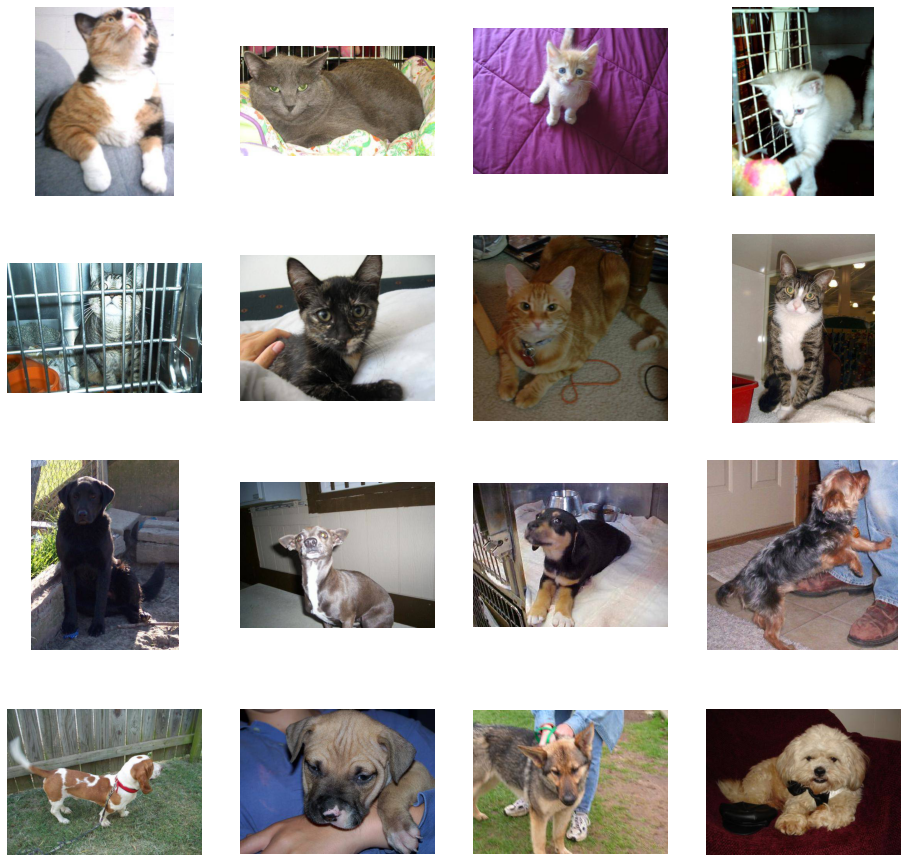

In [0]:
%matplotlib inline 

# output imgs as 4x4 configuration
num_rows, num_columns = 4,4

# define index 
img_index = 0

# get current figure
fig = plt.gcf()
fig.set_size_inches(num_rows * 4, num_columns * 4)

img_index += 8
cats_batch = [os.path.join(train_cats_dir, fname) for fname in train_cats_file_names[img_index-8:img_index]]
dogs_batch = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_file_names[img_index-8:img_index]]

for i, img_path in enumerate(cats_batch+dogs_batch):
  # setup subplot
  sp = plt.subplot(num_rows, num_columns, i+1)
  sp.axis('Off') # don't show axis/gridlines
  # get img
  img = mpimg.imread(img_path)
  # show img
  plt.imshow(img)

plt.show()

# data preprocessing 

ImageDataGenerator is coded to read images from subdirectories, and automatically label them from the name of that subdirectory.

---

example:

you will have a 'training' directory containing a 'cats' directory and a 'dog' one.

ImageGenerator will label the images appropriately for you, reducing a coding step.

In [0]:
# define generators that will structure & preprocess the data based on file_paths
train_data_gen = ImageDataGenerator()
valid_data_gen = ImageDataGenerator()

In [0]:
# flow the imgs from the source directory through the data generators to preprocess in batches
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # resize images into an efficient format
    batch_size=20, # process in batches 
    class_mode='binary'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


![](https://drive.google.com/uc?id=1WMx378iRlIdn35kwc8p3LyPmtVgchy6O)

![](https://drive.google.com/uc?id=1Ewr7dUMEBNj5ngjyd1ErW_wmJEXNwQfS)

![](https://drive.google.com/uc?id=1655EU9dqMwdaJJyQKAXFQjzRG4fkS6XY)

![](https://drive.google.com/uc?id=1LvPqU6tdr7dXAjLtam9CSwYCMRxr5usU)

```
tf.keras.layers.Dense(units=512, activation='relu'),
```

![](https://drive.google.com/uc?id=1JKtAsR-71gAjHnFsM6hR_ds4Jso8BiNc)

# binary cross-entropy

![](https://drive.google.com/uc?id=1yC-OK5pQ7TrY4keLOGHpZwHk29LapDKD)

# backpropogation

![](https://drive.google.com/uc?id=1eGiTpY44J3MN1Ei8cmA_UTaiBWxbLfb4)


![](https://drive.google.com/uc?id=1HpdRUWzYErIQH7mJaXY4zWxJxs-AVIh4)

# define the model

In [0]:
model = tf.keras.Sequential([
  # input_layer                             
  tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=128, activation='relu'),
  # output_layer
  # since we are classifying between 2 labels,
    # sigmoid ideal since it will return 0 or 1, whichever has higher probability
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

'''
Total params: weights + hyperparameters
Trainable params: weights
Non-trainable params: hyperparameters
'''

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 34,626,305
Trainable params: 34,626,305
Non-trainable params: 0
_________________________________________________________________


![](https://drive.google.com/uc?id=12-OldpShzZCgjyQUstMTaEeRskvopqVG)

![](https://drive.google.com/uc?id=15RxgvvrZSrxOiMioJehPkuqSRITRaP9R)

# compile the model

build the model by compiling it with a loss, optimizer, and metrics:
- loss= prediction accuracy
- optimizer= backpropogates derivative of loss to adjust weights and improve prediction accuracy
- metrics= performance benchmarks

---

**Adam optimizer**

Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. 
- In addition to storing an exponentially decaying average of past squared gradients
- Adam also keeps an exponentially decaying average of past gradients.

Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface

```
adam is generally seen as the most versatile
```



In [0]:
# since we are classifying between 2 labels, cats & dogs, use binary crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# train the model

fit the model to train & learn the optimal weights

model will simultaneously train & validate

*assign trained model to history var for performance querying*

In [0]:
history = model.fit(
    train_generator, # dataset=(features, labels)
    steps_per_epoch=100, # train_imgs total 2000 = batch_size(20) * steps(100)
    epochs=10,
    validation_data=valid_generator,
    validation_steps=50, # valid_imgs total 1000 = batch_size(20) * steps(50)
)

Epoch 1/10
100/100 [==============================] - 8s 84ms/step - loss: 1386.2433 - acc: 0.5115 - val_loss: 1027.2911 - val_acc: 0.5030
Epoch 2/10
100/100 [==============================] - 8s 83ms/step - loss: 381.8827 - acc: 0.5575 - val_loss: 512.3189 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 8s 83ms/step - loss: 120.0448 - acc: 0.5875 - val_loss: 42.5019 - val_acc: 0.5930
Epoch 4/10
100/100 [==============================] - 8s 83ms/step - loss: 57.2323 - acc: 0.5825 - val_loss: 43.1356 - val_acc: 0.5490
Epoch 5/10
100/100 [==============================] - 8s 83ms/step - loss: 34.3442 - acc: 0.6160 - val_loss: 69.1244 - val_acc: 0.5070
Epoch 6/10
100/100 [==============================] - 8s 83ms/step - loss: 40.6612 - acc: 0.6055 - val_loss: 38.0048 - val_acc: 0.5330
Epoch 7/10
100/100 [==============================] - 8s 83ms/step - loss: 25.5349 - acc: 0.6015 - val_loss: 45.9461 - val_acc: 0.5030
Epoch 8/10
100/100 [============================

# visualize performance 

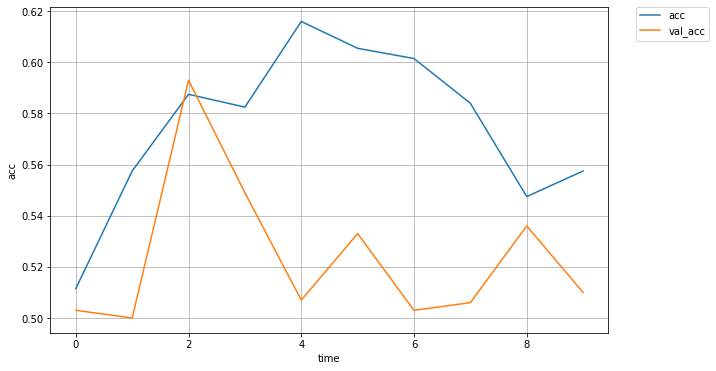

In [0]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'acc')

# reset memory values to prevent side-effects


In [0]:
tf.keras.backend.clear_session()

# convolutional neural networks


![](https://drive.google.com/uc?id=1nvPBZB8whNm9ZPPuaCJBVJdJ4StbiGLp)

![](https://drive.google.com/uc?id=12-OldpShzZCgjyQUstMTaEeRskvopqVG)

![]()

![](https://drive.google.com/uc?id=1yPoY6WdaxoE1sTRMehWgAabXyFIe61ig)

![](https://drive.google.com/uc?id=108rkNCCJlG43JNQ10tqFLR02dQGva_YT)

# preprocessing with normalization

**normalize the images**

```
normalization= proportionally rescale data between 0-1
```

normalize the images to make training less computationally heavy (read: faster)

*8-bit color graphics are a method of storing image information in a computer's memory or in an image file, so that each pixel is represented by one 8-bit byte.*

The maximum number of colors that can be displayed at any one time is **256**

In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
)

validation_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
)

# flow the training imgs to generator in batches of 20 using train_datagen
train_generator = train_datagen.flow_from_directory(
    train_dir, # source of training imgs
    target_size=(150,150), # resize all imgs to 150x150
    batch_size=20, 
    class_mode='binary'
)

# flow the validation imgs to generator in batches of 20 using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # source of validation imgs
    target_size=(150, 150), # resize all imgs to 150x150
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


```
tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3))
```


![](https://drive.google.com/uc?id=1e5vjUFjNG-W133agWE7d-Tikf9bPdwR_)

```  
tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3)),
tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
```

![](https://drive.google.com/uc?id=1OPwh8YmfLCsyNnRWUodY6AueZoHkyJJ4)

```
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
```

![](https://drive.google.com/uc?id=1IZhb62VUqUloQl0EYN9cLjivIImASvjq)

# define convolutional neural network

In [0]:
model = tf.keras.Sequential([
  # input layer that standardizes the shapes of the imgs to 150x150 with 3 color_channels
  # 16 3x3 filters that detect features by striding over image and output into a feature map
  # relu activation function: return if x > 0, else return 0
  # since filter needs valid pixels:
    # filter 1 down & 1 right to account for filter border
    # hence removing 1 per side, output_shape=(None, 148, 148, 16) 
  # filters=neurons                      
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3)),
  # maxPooling layer compresses img and extracts most common feature per filter
  # 2x2 filter that strides 2 cells
  # halves the output_shape=(None, 74, 74, 16)
  tf.keras.layers.MaxPooling2D(2,2),
  # output_shape=(None, 72, 72, 32)
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  # output_shape=(None, 36, 36, 32)
  tf.keras.layers.MaxPooling2D(2,2),
  # output_shape=(None, 34, 34, 64)
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  # output_shape=(None, 17, 17, 64)
  tf.keras.layers.MaxPooling2D(2,2),
  # flatten the input matrix into a 1D array for the dense layers
  tf.keras.layers.Flatten(),
  # fully-connected dense layers map inputs to outputs and id relationships
  # units=neurons
  tf.keras.layers.Dense(units=512, activation='relu'),
  # output layer
  # use sigmoid activation function to solve binary classification problems
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

# compile the cnn

In [0]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['acc'])

# train the cnn

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 8s 84ms/step - loss: 0.7648 - acc: 0.5170 - val_loss: 0.6912 - val_acc: 0.5270
Epoch 2/10
100/100 [==============================] - 8s 84ms/step - loss: 0.6803 - acc: 0.5750 - val_loss: 0.6493 - val_acc: 0.6280
Epoch 3/10
100/100 [==============================] - 8s 84ms/step - loss: 0.6224 - acc: 0.6420 - val_loss: 0.6265 - val_acc: 0.6510
Epoch 4/10
100/100 [==============================] - 8s 84ms/step - loss: 0.5351 - acc: 0.7340 - val_loss: 0.6191 - val_acc: 0.6860
Epoch 5/10
100/100 [==============================] - 8s 84ms/step - loss: 0.4248 - acc: 0.7980 - val_loss: 0.6281 - val_acc: 0.6940
Epoch 6/10
100/100 [==============================] - 8s 84ms/step - loss: 0.3162 - acc: 0.8695 - val_loss: 0.7364 - val_acc: 0.6590
Epoch 7/10
100/100 [==============================] - 9s 85ms/step - loss: 0.1892 - acc: 0.9245 - val_loss: 0.8768 - val_acc: 0.6910
Epoch 8/10
100/100 [==============================] - 9s 85ms/step - 

# visualize performance

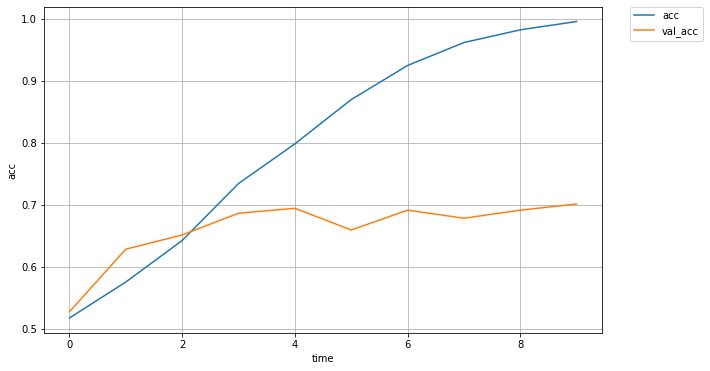

In [0]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'acc')

# reset memory values to prevent side-effects


In [0]:
tf.keras.backend.clear_session()

#overfitting

when a dataset is small, the weights might not be optimized, potentially causing overfitting: 

`high classificaiton accuracy on a limited dataset, but significantly inferior classification accuracy on a general dataset`

![](https://drive.google.com/uc?id=1MSVWHv4a7nVv2iQ7oF6uDJZTuCPpG-FZ) 

```
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40, # randomly rotate (0-180 degrees)
    width_shift_range=0.2, # move img horizontally within frame
    height_shift_range=0.2, # move img vertically within frame
    shear_range=0.2, # transform img to cut out sections (0.2=20%)
    zoom_range=0.2, # magnify % of img
    horizontal_flip=True, # randomly make multiple imgs structurally similar
    fill_mode='nearest' # fill in lost pixels via transformation. 
)
```

![](https://drive.google.com/uc?id=1TA5BHE2gpaN6PQgvnKy52TN34MgEVQSa)

# define callbacks 

increasing the training time, with a increased num_samples, by incrementing the num_epochs will help prevent overfitting as well

that said, if it trains for too long it will eventually start to overfit again.

---

**enable early_stopping**

early_stopping will prevent model from overfitting

In [0]:
# enable early_stopping
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_acc') >= 0.96 and logs.get('acc') >= 0.96:
      print('\nvalidation accuracy and training accuracy higher than 96% \nstopping training')
      self.model.stop_training = True

callbacks = myCallback()

# preprocess

image augmentation is where you adjust the training set to potentially increase the number of diverse subjects it encompasses.
- image augmentation simply amends your images while training using transformations like rotation to simulate different subjects.

image augmentation potentially resolves overfitting by providing a greater span of different images to train on. 


In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40, # randomly rotate (0-180 degrees)
    width_shift_range=0.2, # move img horizontally within frame
    height_shift_range=0.2, # move img vertically within frame
    shear_range=0.2, # transform img to cut out sections (0.2=20%)
    zoom_range=0.2, # magnify % of img
    horizontal_flip=True, # randomly make multiple imgs structurally similar
    fill_mode='nearest' # fill in lost pixels via transformation. 
)

validation_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40, # randomly rotate (0-180 degrees)
    width_shift_range=0.2, # move img horizontally within frame
    height_shift_range=0.2, # move img vertically within frame
    shear_range=0.2, # transform img to cut out sections (0.2=20%)
    zoom_range=0.2, # magnify % of img
    horizontal_flip=True, # randomly make multiple imgs structurally similar
    fill_mode='nearest' # fill in lost pixels via transformation. 
)

# flow the training imgs to generator in batches of 20 using train_datagen
train_generator = train_datagen.flow_from_directory(
    train_dir, # source of training imgs
    target_size=(150,150), # resize all imgs to 150x150
    batch_size=20, 
    class_mode='binary'
)

# flow the validation imgs to generator in batches of 20 using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # source of validation imgs
    target_size=(150, 150), # resize all imgs to 150x150
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


![](https://drive.google.com/uc?id=1vFZ15lgnDsEmPwy_kderqZB0zhi9UGBh)

```
tf.keras.layers.Dropout(0.1), # 10% of neurons are deactivated

tf.keras.layers.Dense(units=512, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
```

# define the model

**dropout layer**

`dropout layer is useful in preventing overfitting by deactivating a random number of neurons in a layer`

adding a dropout layer deters neighbor neurons from having similar weights, thus preserving final training
- a neuron taking in multiple inputs with varying weights cannot rely on any one feature, motivating it to spread out the weights. 

---

**regularization**

in terms of deep learning, `regularization is a technique uses to prevent overfitting` -- training accuracy increasing, but testing accuracy decreases.

- L1 regularization (lasso regression) removes seamingly unimportant features to prevent overfitting, but potentially causing underfitting.

- L2 regularization (ridge regression) gives each feature different weights of importance & influence.



In [0]:
model = tf.keras.Sequential([
  # input layer that standardizes the shapes of the imgs to 150x150 with 3 color_channels
  # 16 3x3 filters that detect features by striding over image and output into a feature map
  # relu activation function: return if x > 0, else return 0
  # since filter needs valid pixels:
    # filter 1 down & 1 right to account for filter border
    # hence removing 1 per side, output_shape=(None, 148, 148, 16) 
  # filters=neurons                      
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150,150, 3)),
  # maxPooling layer compresses img and extracts most common feature per filter
  # 2x2 filter that strides 2 cells
  # halves the output_shape=(None, 74, 74, 16)
  tf.keras.layers.MaxPooling2D(2,2),
  # output_shape=(None, 72, 72, 32)
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  # output_shape=(None, 36, 36, 32)
  tf.keras.layers.MaxPooling2D(2,2),
  # output_shape=(None, 34, 34, 64)
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  # output_shape=(None, 17, 17, 64)
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1), # 10% of neurons are deactivated
  # flatten the input matrix into a 1D array for the dense layers
  tf.keras.layers.Flatten(),
  # fully-connected dense layers map inputs to outputs and id relationships
  # units=neurons
  tf.keras.layers.Dense(units=512, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
  # output layer
  # use sigmoid activation function to solve binary classification problems
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# params = weights
# non-trainable params = hyperparameters
# hyperparameters are values set before the learning process
  # ex) batch_size, alpha, or gamma
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 64)       

# compile the model

In [0]:
model.compile( loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['acc'])

# train the model


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 2000 imgs = batch_size(20) * steps(100)
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50, # 1000 imgs = batch_size(20) * steps(50)
    callbacks=[callbacks],
)

Epoch 1/30
100/100 [==============================] - 20s 205ms/step - loss: 0.6993 - acc: 0.5220 - val_loss: 0.6857 - val_acc: 0.5140
Epoch 2/30
100/100 [==============================] - 20s 205ms/step - loss: 0.6801 - acc: 0.5865 - val_loss: 0.6776 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 20s 201ms/step - loss: 0.6690 - acc: 0.6155 - val_loss: 0.6849 - val_acc: 0.5740
Epoch 4/30
100/100 [==============================] - 20s 200ms/step - loss: 0.6688 - acc: 0.6175 - val_loss: 0.6563 - val_acc: 0.6380
Epoch 5/30
100/100 [==============================] - 20s 200ms/step - loss: 0.6525 - acc: 0.6320 - val_loss: 0.6439 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 20s 200ms/step - loss: 0.6490 - acc: 0.6240 - val_loss: 0.6527 - val_acc: 0.6410
Epoch 7/30
100/100 [==============================] - 20s 199ms/step - loss: 0.6419 - acc: 0.6270 - val_loss: 0.6162 - val_acc: 0.6600
Epoch 8/30
100/100 [==============================] - 2

# visualize performance

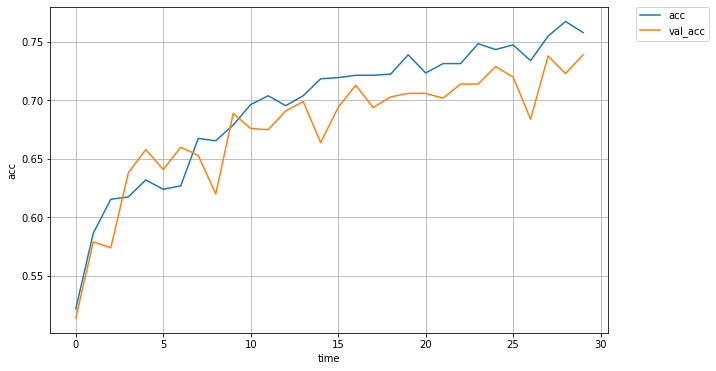

In [0]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'acc')

# reset memory values to prevent side-effects


In [0]:
tf.keras.backend.clear_session()

![](https://drive.google.com/uc?id=1xs1fKGigo4K4kPDKNGm-2DlP90QGYOJ2)

# transfer learning 

transfer learning allows you to retrain the final layer of an existing model.

being able to retrain the final layer means that you can maintain the knowledge that the model had learned during its original training and apply it to your smaller dataset to achieve a specific task. 

`transfer learning results in highly accurate classifications without the need for extensive training time and computational power.`


In [0]:
from tensorflow.keras import layers # inspect layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# get pre-trained model weights



In [0]:
%%capture
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
# model with trained layers 
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# define pretrained model
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3),
    include_top= False, # go stright to convolutions
    weights = None
)

# load_weights on to model
pre_trained_model.load_weights(local_weights_file)

# pre-trained model freezing  

for transfer learning, freeze the weights (trainable=False) of an existing model and add specialized (trainable=True) top layer 

In [0]:
# loop through model layers and freeze
for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()

# inspect pre-trained model output layer

In [0]:
last_layer = pre_trained_model.get_layer('mixed7') # can get layer name from model summary
print('top layer output_shape: {}'.format(last_layer.output_shape))
last_output = last_layer.output


top layer output_shape: (None, 7, 7, 768)


# define model with specialized layers 

**transfer learning**

`add specialized layers that will be on top of the frozen layers of the pre-trained model`

---

**dropout layer**

`dropout layer is useful in preventing overfitting by deactivating a random number of neurons in a layer`

adding a dropout layer deters neighbor neurons from having similar weights, thus preserving final training
- a neuron taking in multiple inputs with varying weights cannot rely on any one feature, motivating it to spread out the weights. 



In [ ]:
# formatting layer(x) is an alt method to building a model

x = layers.Flatten()(last_output) # flatten input (the output from InceptionV3)
x = layers.Dense(units=1024, activation='relu')(x) # add dense hidden layer
x = layers.Dropout(0.15)(x) # droput 15% of the neurons 
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x) # add output layer

model = Model(pre_trained_model.input, x) # create model: Model(input, layers_definition)
# model.summary()

# compile the model

In [0]:
# since its a binary classifier, use binary crossentropy loss
# lr = learning rate/alpha 
  # 1e-3 = 0.0001
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-3), metrics=['acc'])

# train the model

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 2000 train images = batch_size (20) * steps (100)
    epochs=30, 
    validation_data=validation_generator,
    validation_steps=50, # 1000 validation imgs= batch_size(20) * steps(50)
    callbacks=[callbacks]
)

Epoch 1/30
100/100 [==============================] - 23s 227ms/step - loss: 0.5433 - acc: 0.8395 - val_loss: 0.2248 - val_acc: 0.9030
Epoch 2/30
100/100 [==============================] - 22s 218ms/step - loss: 0.2081 - acc: 0.9120 - val_loss: 0.2062 - val_acc: 0.9130
Epoch 3/30
100/100 [==============================] - 22s 219ms/step - loss: 0.1696 - acc: 0.9355 - val_loss: 0.1798 - val_acc: 0.9210
Epoch 4/30
100/100 [==============================] - 22s 217ms/step - loss: 0.1890 - acc: 0.9240 - val_loss: 0.1568 - val_acc: 0.9370
Epoch 5/30
100/100 [==============================] - 22s 218ms/step - loss: 0.1559 - acc: 0.9360 - val_loss: 0.1937 - val_acc: 0.9240
Epoch 6/30
100/100 [==============================] - 22s 216ms/step - loss: 0.1587 - acc: 0.9330 - val_loss: 0.1773 - val_acc: 0.9240
Epoch 7/30
100/100 [==============================] - 21s 215ms/step - loss: 0.1467 - acc: 0.9410 - val_loss: 0.1605 - val_acc: 0.9330
Epoch 8/30
100/100 [==============================] - 2

# visualize performance 

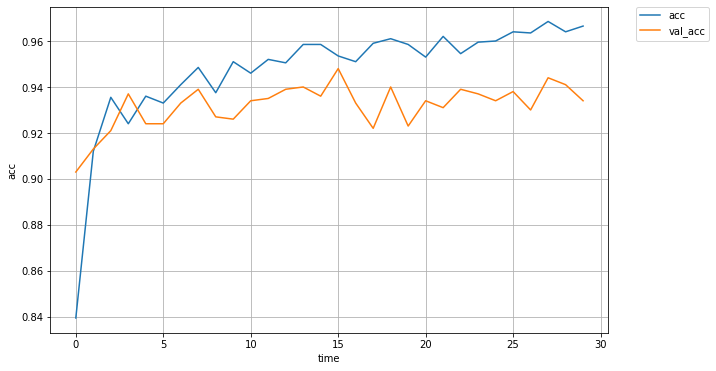

In [0]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'acc')

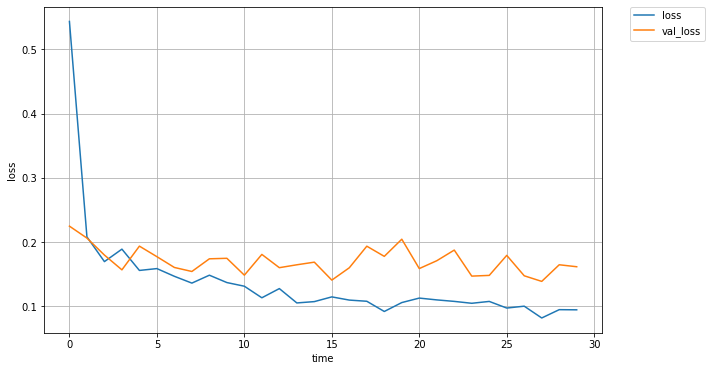

In [0]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'loss')

# clean up

In [0]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)

![](https://drive.google.com/uc?id=1nvPBZB8whNm9ZPPuaCJBVJdJ4StbiGLp)

![](https://drive.google.com/uc?id=11IAZTBPFxMi3yRKQphan2KylLeniuDaJ)